In [1]:
# Importing Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Dataset
titanic_df = pd.read_csv('titanic.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# Handling Missing Value in Age by filling mean value age & change datatype to int.
mean_age = titanic_df['Age'].mean()
titanic_df['Age'].fillna(mean_age, inplace=True)
titanic_df['Age'] = titanic_df['Age'].astype(int)

In [17]:
# Handling Missing Value in Embarked by filling mode value of Embarked.
titanic_df.fillna(titanic_df['Embarked'].mode, inplace=True)

In [18]:
# delete Cabin columns because to much null value.
titanic_df=titanic_df.drop(columns=['Cabin'])

In [19]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,1


In [20]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
dtype: int64

In [21]:
titanic_df.duplicated().sum()

0

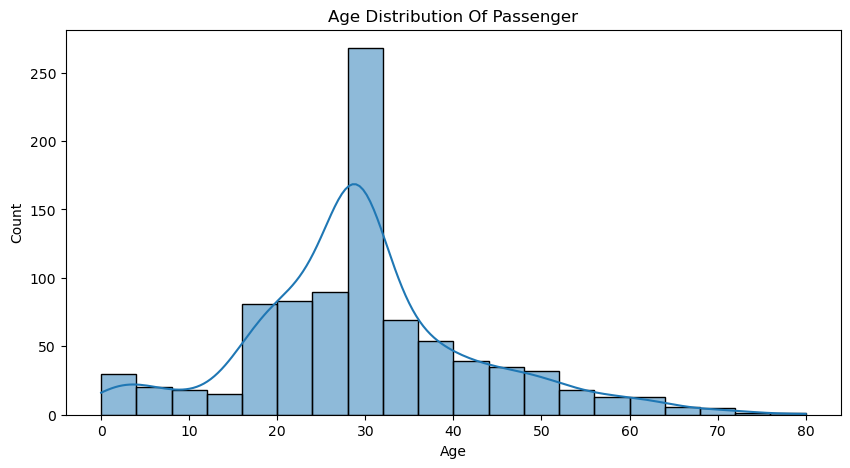

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(titanic_df['Age'],bins=20,kde=True)
plt.title('Age Distribution Of Passenger')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

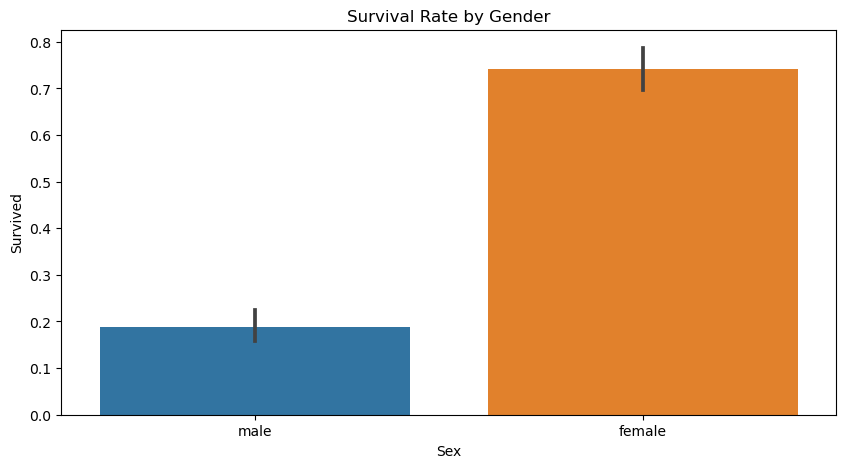

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x='Sex',y='Survived',data=titanic_df)
plt.title('Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

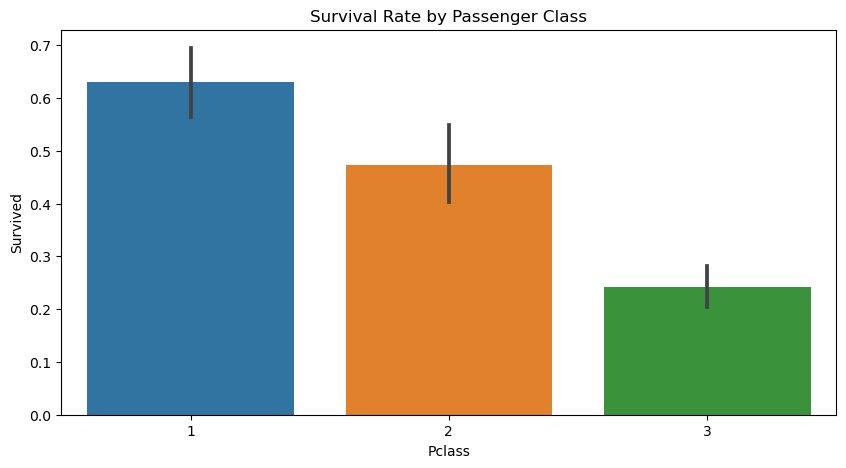

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='Pclass',y='Survived',data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

In [25]:
titanic_df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.033741,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.067809,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.335071,0.083081,0.018443,-0.549500,0.065997
Age,0.033741,-0.067809,-0.335071,1.000000,-0.232743,-0.176744,0.093856,-0.247370
SibSp,-0.057527,-0.035322,0.083081,-0.232743,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.176744,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.093856,0.159651,0.216225,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.247370,0.890712,0.783111,0.217138,1.000000


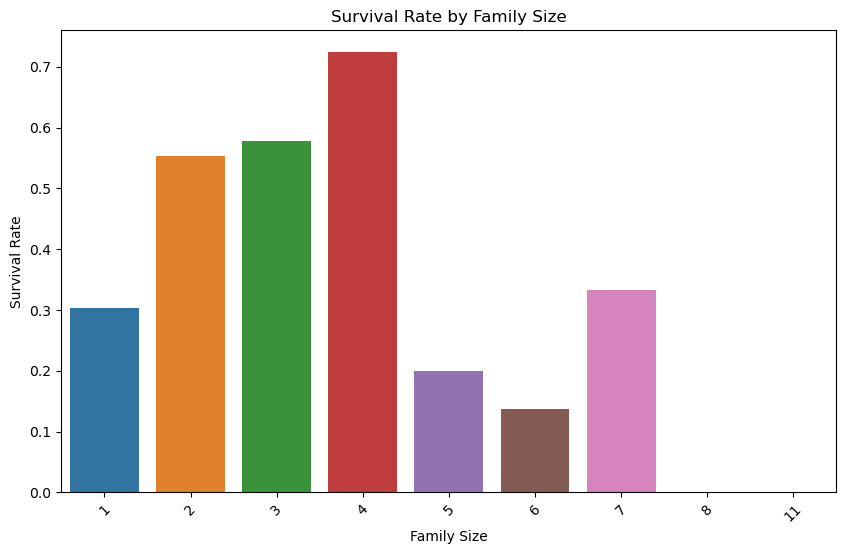

In [26]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1  # Include the passenger itself
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=titanic_df, ci=None)  # ci=None to suppress error bars
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)  
plt.show()

## Observing

**Female Passenger Had a higher Survival rate compared to male passenger**

**Passenger in higher Classes (Pclass) Had A Higher Survival Rate**

**The Majority of Passenger Were In the range Of 20 to 30**

**Higher Survival Rates For Passenger With Small Family Sizes While Larger Families may have Lower Survival Rates**